In [ ]:
!pip install pyspark==3.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.1/209.1 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 19.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.3-py2.py3-none-any.whl size=209435951 sha256=e198d7ab8f137238934094f5d89cc0a88ecd3943c702300b507fcba2ba0106a4
  Stored in directory: /root/.cache/pip/wheels/40/50/14/79047c3c171b701e591d287b78a201214d9c8e0b93fef64458
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

spark = SparkSession.builder \
          .appName("DistributedComputingExample") \
          .getOrCreate()

In [ ]:
file_path = "/content/diabetcsv.csv"
df = spark.read.csv(file_path,header=True, inferSchema=True)

df.show()

+----+----+----+----+----+----+-----+---+---------------+
|preg|plas|pres|skin|insu|mass| pedi|age|          class|
+----+----+----+----+----+----+-----+---+---------------+
|   6| 148|  72|  35|   0|33.6|0.627| 50|tested_positive|
|   1|  85|  66|  29|   0|26.6|0.351| 31|tested_negative|
|   8| 183|  64|   0|   0|23.3|0.672| 32|tested_positive|
|   1|  89|  66|  23|  94|28.1|0.167| 21|tested_negative|
|   0| 137|  40|  35| 168|43.1|2.288| 33|tested_positive|
|   5| 116|  74|   0|   0|25.6|0.201| 30|tested_negative|
|   3|  78|  50|  32|  88|31.0|0.248| 26|tested_positive|
|  10| 115|   0|   0|   0|35.3|0.134| 29|tested_negative|
|   2| 197|  70|  45| 543|30.5|0.158| 53|tested_positive|
|   8| 125|  96|   0|   0| 0.0|0.232| 54|tested_positive|
|   4| 110|  92|   0|   0|37.6|0.191| 30|tested_negative|
|  10| 168|  74|   0|   0|38.0|0.537| 34|tested_positive|
|  10| 139|  80|   0|   0|27.1|1.441| 57|tested_negative|
|   1| 189|  60|  23| 846|30.1|0.398| 59|tested_positive|
|   5| 166|  7

In [ ]:
mean_mass_per_age_group = df.groupBy("age").agg(avg("mass").alias("Mean_Mass"))

mean_mass_per_age_group.show()
df.show()
spark.stop()

+---+------------------+
|age|         Mean_Mass|
+---+------------------+
| 31| 34.01666666666666|
| 65|31.600000000000005|
| 53|30.500000000000007|
| 34|31.164285714285715|
| 81|              25.9|
| 28|33.642857142857146|
| 26|34.915151515151514|
| 27|31.949999999999992|
| 44|           34.1625|
| 22| 29.50972222222222|
| 47| 34.56666666666667|
| 52|            33.475|
| 40| 33.53846153846154|
| 57|              29.7|
| 54|30.799999999999997|
| 48|29.979999999999997|
| 64|              25.0|
| 41|  35.2590909090909|
| 43|36.892307692307696|
| 37|32.078947368421055|
+---+------------------+
only showing top 20 rows

+----+----+----+----+----+----+-----+---+---------------+
|preg|plas|pres|skin|insu|mass| pedi|age|          class|
+----+----+----+----+----+----+-----+---+---------------+
|   6| 148|  72|  35|   0|33.6|0.627| 50|tested_positive|
|   1|  85|  66|  29|   0|26.6|0.351| 31|tested_negative|
|   8| 183|  64|   0|   0|23.3|0.672| 32|tested_positive|
|   1|  89|  66|  23|  94|

Time Series Analysis


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/demand_june.csv", parse_dates=['date'], index_col='date')

                    REGION  TOTALDEMAND   RRP PERIODTYPE
date                                                    
2023-01-06 00:05:00   NSW1      7953.04  90.2      TRADE
2023-01-06 00:10:00   NSW1      7967.67  90.2      TRADE
2023-01-06 00:15:00   NSW1      7923.89  90.2      TRADE
2023-01-06 00:20:00   NSW1      7907.81  90.2      TRADE
2023-01-06 00:25:00   NSW1      7855.31  90.2      TRADE
        TOTALDEMAND           RRP
count   7776.000000   7776.000000
mean    8382.620156    106.006049
std     1384.479890    248.338411
min     5642.400000    -50.010000
25%     7304.410000     64.990000
50%     8207.640000     89.000000
75%     9336.162500    117.940000
max    12589.220000  14800.000000


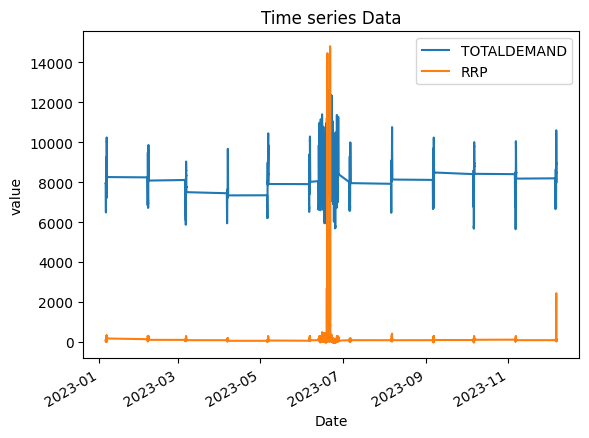

In [ ]:
print(df.head())
print(df.describe())
df.plot()
plt.xlabel('Date')
plt.ylabel('value')
plt.title('Time series Data')
plt.show()

                    REGION  TOTALDEMAND     RRP PERIODTYPE
date                                                      
2023-01-06 00:05:00   NSW1      7953.04   90.20      TRADE
2023-01-06 00:10:00   NSW1      7967.67   90.20      TRADE
2023-01-06 00:15:00   NSW1      7923.89   90.20      TRADE
2023-01-06 00:20:00   NSW1      7907.81   90.20      TRADE
2023-01-06 00:25:00   NSW1      7855.31   90.20      TRADE
...                    ...          ...     ...        ...
2023-06-27 23:40:00   NSW1      8536.43  116.99      TRADE
2023-06-27 23:45:00   NSW1      8527.02   89.00      TRADE
2023-06-27 23:50:00   NSW1      8489.29   88.88      TRADE
2023-06-27 23:55:00   NSW1      8358.07   61.74      TRADE
2023-06-28 00:00:00   NSW1      8394.93   64.77      TRADE

[6048 rows x 4 columns]


<ipython-input-10-af244251c36e>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  subset1 = df['2023-01-01': '2023-06-30']


<Axes: xlabel='date'>

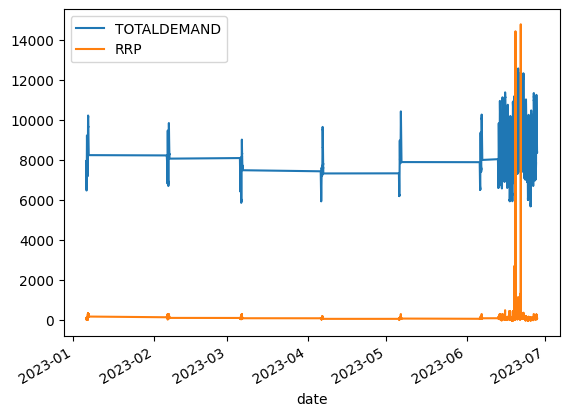

In [ ]:
subset1 = df['2023-01-01': '2023-06-30']
print(subset1)
subset1.plot()

                    REGION  TOTALDEMAND     RRP PERIODTYPE
date                                                      
2023-01-06 00:05:00   NSW1      7953.04   90.20      TRADE
2023-01-06 00:10:00   NSW1      7967.67   90.20      TRADE
2023-01-06 00:15:00   NSW1      7923.89   90.20      TRADE
2023-01-06 00:20:00   NSW1      7907.81   90.20      TRADE
2023-01-06 00:25:00   NSW1      7855.31   90.20      TRADE
...                    ...          ...     ...        ...
2023-06-27 23:40:00   NSW1      8536.43  116.99      TRADE
2023-06-27 23:45:00   NSW1      8527.02   89.00      TRADE
2023-06-27 23:50:00   NSW1      8489.29   88.88      TRADE
2023-06-27 23:55:00   NSW1      8358.07   61.74      TRADE
2023-06-28 00:00:00   NSW1      8394.93   64.77      TRADE

[6336 rows x 4 columns]


<ipython-input-11-e9767889c30d>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  subset1 = df['2023-01-01': '2023-07-31']


<Axes: xlabel='date'>

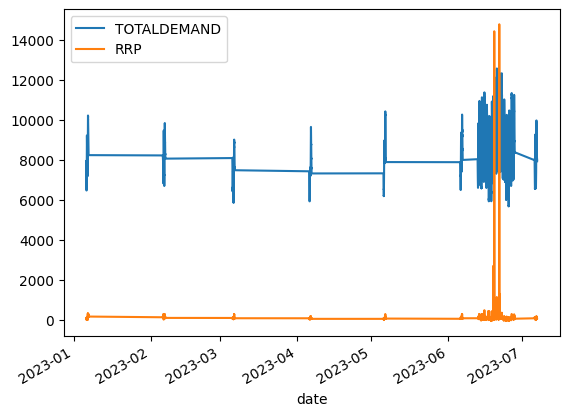

In [ ]:
subset1 = df['2023-01-01': '2023-07-31']
print(subset1)
subset1.plot()

                    REGION  TOTALDEMAND     RRP PERIODTYPE
date                                                      
2023-07-06 00:00:00   NSW1      8000.01   86.74      TRADE
2023-07-06 00:05:00   NSW1      7998.30  100.08      TRADE
2023-07-06 00:10:00   NSW1      8049.30  140.17      TRADE
2023-07-06 00:15:00   NSW1      7989.95  104.53      TRADE
2023-07-06 00:20:00   NSW1      7991.63   95.37      TRADE
...                    ...          ...     ...        ...
2023-07-06 23:35:00   NSW1      8024.09   88.88      TRADE
2023-07-06 23:40:00   NSW1      8037.16   88.88      TRADE
2023-07-06 23:45:00   NSW1      7965.84   88.88      TRADE
2023-07-06 23:50:00   NSW1      8037.63   98.90      TRADE
2023-07-06 23:55:00   NSW1      7948.60   88.88      TRADE

[288 rows x 4 columns]


<ipython-input-15-63d2ee61ffed>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  subset2 = df['2023-07-01': '2023-07-31']


<Axes: xlabel='date'>

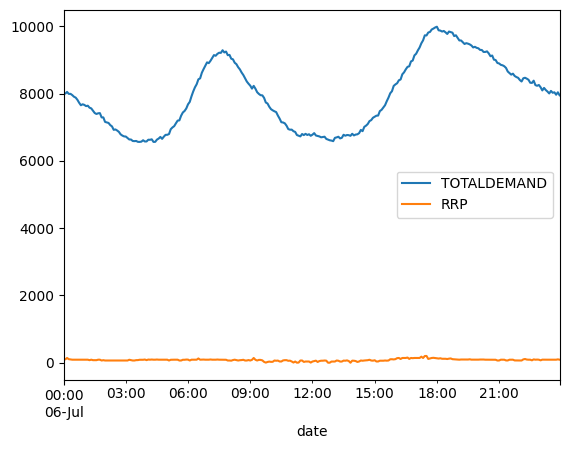

In [ ]:
subset2 = df['2023-07-01': '2023-07-31']
print(subset2)
subset2.plot()